# Análisis de la subocupación en Argentina 1er trimestre 2021.
**Por Violeta Carrera Pereyra** 


## Objetivo
Este trabajo tiene como objetivo hacer una caracterización de la subocupacion en Argentina y comparar sus principales rasgos con los ocupados plenos (categoría considerada ideal). Para ello se utilizó la EPH (Encuesta Permanente de Hogares) realizada por el INDEC del primer trimestre del 2021. Las siguientes preguntas recorren el análisis de los datos:
- ¿Varía la composición de los subocupados según el sexo?
- ¿El nivel educativo condiciona la intensidad de ocupación?
- ¿Cómo afecta la edad a la intensidad de ocupación?
- ¿Perciben menores ingresos las personas subocupadas? ¿Viven en hogares más pobres que las personas ocupadas plenas?
- ¿En qué medida las personas subocupadas están en una relación de dependencia formal y registrada?



## Tabla de contenidos
1. Carga de datos
2. Exploración de datos
3. Limpieza de datos
4. Presentación de datos
5. Conclusiones
6. Referencias





# 1. Carga de datos
Carga de la base (Encuesta Permanente de Hogares del INDEC primer trimestre del 2021) y recorte de las columnas con las que se trabajará.



In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style


In [2]:
style.use('seaborn-whitegrid')

In [4]:
#Importar datos
eph_completa = pd.read_excel("data/usu_individual_T121.xlsx")
eph_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46693 entries, 0 to 46692
Columns: 177 entries, CODUSU to PONDIH
dtypes: float64(115), int64(59), object(3)
memory usage: 63.1+ MB


In [97]:
print(list(eph_completa.columns))


['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP

In [5]:
#Recorte de la base
eph = eph_completa[["CODUSU", "REGION", "AGLOMERADO", "CH04", "CH06", "NIVEL_ED", "CAT_OCUP", "PP03C", "INTENSI", "PP07A", "P47T", "DECINDR", "ITF", "DECIFR", "PP07H", "ESTADO"]]

# 2. Exploración de datos


In [99]:
eph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46693 entries, 0 to 46692
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      46693 non-null  object 
 1   REGION      46693 non-null  int64  
 2   AGLOMERADO  46693 non-null  int64  
 3   CH04        46693 non-null  int64  
 4   CH06        46693 non-null  int64  
 5   NIVEL_ED    46693 non-null  int64  
 6   CAT_OCUP    46693 non-null  int64  
 7   PP03C       19014 non-null  float64
 8   INTENSI     19014 non-null  float64
 9   PP07A       19014 non-null  float64
 10  P47T        46619 non-null  float64
 11  DECINDR     46693 non-null  int64  
 12  ITF         46691 non-null  float64
 13  DECIFR      46691 non-null  float64
 14  PP07H       19014 non-null  float64
 15  ESTADO      46693 non-null  int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 5.7+ MB


In [100]:
eph.sample(5)

,CODUSU,REGION,AGLOMERADO,CH04,CH06,NIVEL_ED,CAT_OCUP,PP03C,INTENSI,PP07A,P47T,DECINDR,ITF,DECIFR,PP07H,ESTADO
2580,TQRMNOPWXHKOKMCDEFKID00652486,43,4,2,73,6,0,NaN,NaN,NaN,-9.0,12,0.0,12.0,NaN,3
34953,TQRMNOSVRHLMLNCDEHPJB00649984,40,29,2,16,3,0,NaN,NaN,NaN,0.0,0,49100.0,4.0,NaN,3
40673,TQRMNOTTWHLOMPCDEIJAH00650744,1,33,2,3,7,0,NaN,NaN,NaN,0.0,0,62000.0,6.0,NaN,4
43993,TQRMNORXRHMMKMCDEIOAH00699311,43,38,2,47,3,0,NaN,NaN,NaN,12000.0,2,162000.0,10.0,NaN,3
44714,TQRMNOQQWHKNKQCDEOHCH00656893,44,91,1,19,3,2,1.0,2.0,0.0,18000.0,3,50000.0,5.0,0.0,1


In [101]:
eph.shape

(46693, 16)

In [102]:
#Valores únicos y frecuencia relativa de cada columna del dataset (aplicado solo a variables categóricas y edad)
#Región geográfica
print(eph.REGION.unique())
eph.REGION.value_counts(dropna=False, normalize=True)

[43 41 44 42 40  1]


43    0.307412
40    0.240914
44    0.139892
42    0.117084
41    0.107275
1     0.087422
Name: REGION, dtype: float64

In [103]:
#Aglomerado urbano
print(eph.AGLOMERADO.unique())
eph.AGLOMERADO.value_counts(dropna=False, normalize=True)

[ 2  3  4  5  6  7  8  9 10 12 13 14 15 17 18 19 20 22 23 25 26 27 29 30
 31 32 33 34 36 38 91 93]


33    0.066070
23    0.054890
10    0.050179
29    0.043583
4     0.039321
19    0.038807
27    0.038357
18    0.036858
14    0.035980
13    0.035701
25    0.034288
5     0.032553
22    0.032489
38    0.032146
15    0.031739
6     0.029276
26    0.028548
7     0.028141
12    0.026813
91    0.026685
2     0.026385
17    0.023986
9     0.023580
93    0.023451
3     0.022916
36    0.021952
32    0.021352
20    0.021245
31    0.020945
8     0.020581
34    0.020239
30    0.010944
Name: AGLOMERADO, dtype: float64

In [104]:
#Sexo
print(eph.CH04.unique())
eph.CH04.value_counts(dropna=False, normalize=True)

[2 1]


2    0.522005
1    0.477995
Name: CH04, dtype: float64

In [105]:
#Edad
print(eph.CH06.unique())
eph.CH06.value_counts(dropna=False, normalize=True)

[ 27  26  38  33  15  17  10  25  21  49  37  62  34  28  60  69  70  74
  44  54  50  19  68  67  58  61  75  56  59  42  40  16  14  64  30  32
  55  24  22  18  11   7  43  47   9  35   6  63  45  57  46   4  53  20
  36  41  51  52  91  72   8  29  31  77  66  23  80  81  48   5  12   3
   2  13  84  82  71  65  76  73  78  79  -1   1  85  39  89  90  83  97
  92  87  88  86  98  93  94  99  96  95 101]


20     0.017454
16     0.016705
21     0.016683
17     0.016448
23     0.016448
         ...   
95     0.000150
97     0.000128
98     0.000107
99     0.000107
101    0.000021
Name: CH06, Length: 101, dtype: float64

In [106]:
#Nivel educativo
print(eph.NIVEL_ED.unique())
eph.NIVEL_ED.value_counts(dropna=False, normalize=True)

[6 5 3 1 2 4 7]


3    0.209582
4    0.198252
1    0.142291
6    0.129848
2    0.123487
5    0.120703
7    0.075836
Name: NIVEL_ED, dtype: float64

In [107]:
#Categoría ocupacional
print(eph.CAT_OCUP.unique())
eph.CAT_OCUP.value_counts(dropna=False, normalize=True)

[3 0 2 1 4 9]


0    0.563703
3    0.314287
2    0.103806
1    0.015141
4    0.003020
9    0.000043
Name: CAT_OCUP, dtype: float64

In [108]:
#Cantidad de empleos
print(eph.PP03C.unique())
eph.PP03C.value_counts(dropna=False, normalize=True)

[ 1. nan  2.  0.]


NaN    0.592787
1.0    0.338680
0.0    0.039985
2.0    0.028548
Name: PP03C, dtype: float64

In [109]:
#Estado de ocupación
print(eph.ESTADO.unique())
eph.ESTADO.value_counts(dropna=False)

[1 3 2 4 0]


3    19684
1    19014
4     6155
2     1766
0       74
Name: ESTADO, dtype: int64

In [110]:
#Intensidad de la ocupación
print(eph.INTENSI.unique())
eph.INTENSI.value_counts(dropna=False, normalize=True)

[ 3. nan  1.  4.  2.]


NaN    0.592787
2.0    0.208725
3.0    0.109374
1.0    0.049108
4.0    0.040006
Name: INTENSI, dtype: float64

In [111]:
#Hace cuánto trabajan en la ocupación principal
print(eph.PP07A.unique())
eph.PP07A.value_counts(dropna=False, normalize=True)

[ 5. nan  2.  0.  6.  4.  3.  9.  1.]


NaN    0.592787
6.0    0.150365
0.0    0.141563
5.0    0.073930
2.0    0.012529
4.0    0.011522
3.0    0.009637
1.0    0.007003
9.0    0.000664
Name: PP07A, dtype: float64

In [112]:
#Deciles de ingreso total
print(eph.DECINDR.unique())
eph.DECINDR.value_counts(dropna=False, normalize=True)

[ 7  4 12  2  0  3  1  5  6  9 10  8 13]


0     0.388902
12    0.081554
3     0.065277
2     0.063414
5     0.056839
6     0.056582
4     0.056197
7     0.051121
1     0.050264
8     0.045510
9     0.044482
10    0.038314
13    0.001542
Name: DECINDR, dtype: float64

In [113]:
#Deciles de ingreso familiar
print(eph.DECIFR.unique())
eph.DECIFR.value_counts(dropna=False, normalize=True)

[ 4.  2. 12.  1.  9.  8.  5. 10.  6.  7.  3.  0. nan]


12.0    0.180734
7.0     0.099308
4.0     0.092326
3.0     0.085944
5.0     0.085216
6.0     0.084167
8.0     0.083524
9.0     0.082346
2.0     0.076521
10.0    0.066670
1.0     0.059923
0.0     0.003277
NaN     0.000043
Name: DECIFR, dtype: float64

In [114]:
#Descuento por jubilación
print(eph.PP07H.unique())
eph.PP07H.value_counts(dropna=False, normalize=True)

[ 1. nan  2.  0.]


NaN    0.592787
1.0    0.192727
0.0    0.114021
2.0    0.100465
Name: PP07H, dtype: float64

In [23]:
#Resúmenes estadísticos de variables de razón (CH06= años, P47T= monto del ingreso total, ITF= monto del ingreso familiar)
eph.describe()[["CH06", "P47T", "ITF"]]

,CH06,P47T,ITF
count,46693.000000,46619.000000,46691.000000
mean,35.819952,19814.440786,61272.261742
std,22.439663,31705.829005,59675.746294
min,-1.000000,-9.000000,0.000000
25%,17.000000,0.000000,20800.000000
50%,33.000000,6000.000000,50000.000000
75%,53.000000,30000.000000,84000.000000
max,101.000000,819000.000000,819000.000000


De la lectura de los outputs correspondientes a esta sección se desprende una constatación central: la presencia de la misma cantidad de datos nulos (27679) en 5 columnas (PP03C, INTENSI, PP04D, PP07A y PP07H). Luego de realizar el value_counts de la columna del dataset ESTADO esta particularidad de la base cobra sentido: los datos no nulos de las 5 columnas corresponden a los ocupados (o valor 1 de la columna ESTADO). Es decir, son todas preguntas que solamente se le hicieron a las personas ocupadas. Como en la proxima sección se filtraran solamente los casos de los ocupados estos valores nulos no resultan un problema.  
Sí parece haber habido un error en la carga de datos en la variable edad. Al ver el mínimo de la columna y sus valores únicos aparece el -1 como un valor dispuesto. Habrá que solucionar este problema en la limpieza de datos. 
Cabe mencionar, también, el valor mínimo de P47T (monto total de ingresos indivudales). El -9 y el 9, 99 y 999 en el resto de las variables se corresponde con el "No sabe/no contesta". Algo similar sucede con el 12 y 13 que aparecen como valores únicos en DECIFR y DECINDR (variables que versan sobre los deciles de ingresos); indican que no se respondio a la pregunta o que no se hizo la entrevista individual, respectivamente. También será necesario, entonces, eliminar el -9 en las variables de ingresos para que no sesge los gráficos.  
Más allá de lo ya mencionado no encuentro anomalías: todos los valores que adquieren las variables estan contemplados en el manual de la EPH y en la próxima sección se procederá a etiquetarlos para que los datos puedan cobrar cierto sentido. 

# 3. Limpieza de datos 
Se realizará primero un recorte de la base y se etiquetaran los valores y las variables. Una vez recortada no deberían quedar valores nulos (por la correspondencia de estos con las personas no ocupadas). A su vez, se procederá a eliminar los casos mencionados en las conclusiones de la exploración (edad -1 e ingresos -9) y a guardar la base limpia.


In [7]:
#Renombre de columnas
eph.rename(columns = {'CH04': 'SEXO', 'CH06': 'AÑOS', "NIVEL_ED": "NIVEL_EDUCATIVO", "CAT_OCUP": "CATEGORÍA_OCUPACIONAL", "PP03C": "CANTIDAD_DE_TRABAJOS", "PP07A": "ANTIGUEDAD_EN_OCUPACIÓN", "P47T": "MONTO_DE_INGRESO_TOTAL", "DECINDR": "DECIL_DE_INGRESOS", "ITF": "INGRESO_TOTAL_FAMILIAR", "DECIFR": "DECILES_SEGÚN_INGRESO_FAMILIAR", "PP07H": "DESCUENTO_POR_JUBILACIÓN", "INTENSI": "INTENSIDAD_DE_LA_OCUPACIÓN", "ESTADO": "ESTADO_DE_OCUPACIÓN"},inplace = True)


In [8]:
eph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46693 entries, 0 to 46692
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CODUSU                          46693 non-null  object 
 1   REGION                          46693 non-null  int64  
 2   AGLOMERADO                      46693 non-null  int64  
 3   SEXO                            46693 non-null  int64  
 4   AÑOS                            46693 non-null  int64  
 5   NIVEL_EDUCATIVO                 46693 non-null  int64  
 6   CATEGORÍA_OCUPACIONAL           46693 non-null  int64  
 7   CANTIDAD_DE_TRABAJOS            19014 non-null  float64
 8   INTENSIDAD_DE_LA_OCUPACIÓN      19014 non-null  float64
 9   ANTIGUEDAD_EN_OCUPACIÓN         19014 non-null  float64
 10  MONTO_DE_INGRESO_TOTAL          46619 non-null  float64
 11  DECIL_DE_INGRESOS               46693 non-null  int64  
 12  INGRESO_TOTAL_FAMILIAR          

In [10]:
#Renombrando valores
eph.replace({"REGION" : { 1 : "Gran Buenos Aires", 40 : "NOA", 41 : "NEA", 42 : "Cuyo", 43: "Pampeana", 44: "Patagonia"},
            "SEXO" : { 1 : "Varón", 2 : "Mujer"},
            "NIVEL_EDUCATIVO" : {1 : "Primario incompleto", 2 : "Primario completo", 3: "Secundario incompleto", 
                                 4: "Secundario completo", 5: "Superior universitario incompleto",
                                6: "Superior universitario completo", 7 : "Sin instrucción", 8: "Ns/Nc"},
            "CATEGORÍA_OCUPACIONAL" : {0: "No le corresponde la secuencia analizada", 1: "Patrón", 2: "Cuenta propia",
                                      3 : "Obrero o empleado", 4: "Trabajador familiar sin remuneración",
                                      9: "Ns/Nc"},
            "CANTIDAD_DE_TRABAJOS" : {1: "Un solo empleo o actividad", 2: "Más de un empleo o actividad",
                                      0: "No le corresponde la secuencia analizada"},
            "INTENSIDAD_DE_LA_OCUPACIÓN" : {1: "Subocupado", 2 : "Ocupado pleno", 3: "Sobreocupado", 
                                            4: "Ocupado que no trabajó en la semana", 9: "Ns/Nc"},
            "ANTIGUEDAD_EN_OCUPACIÓN" : {1: "Menos de un mes",
                                        2: "1 a 3 meses", 3: "más de 3 meses a 6 meses", 4: "más de 6 a 12 meses",
                                        5: "más de 1 a 5 años", 6: "más de 5 años", 9: "Ns/Nc"},
            "DECIL_DE_INGRESOS" : {12: "No hay respuesta de ingresos", 13: "Entrevista individual no analizada"},
            "DECILES_SEGÚN_INGRESO_FAMILIAR" : {12: "No hay respuesta de ingresos", 13: "Entrevista individual no analizada"},
            "DESCUENTO_POR_JUBILACIÓN" : {1: "Sí", 2: "No", 0: "No le corresponde la secuencia analizada"}},inplace = True)

In [11]:
eph.sample(5)

,CODUSU,REGION,AGLOMERADO,SEXO,AÑOS,NIVEL_EDUCATIVO,CATEGORÍA_OCUPACIONAL,CANTIDAD_DE_TRABAJOS,INTENSIDAD_DE_LA_OCUPACIÓN,ANTIGUEDAD_EN_OCUPACIÓN,MONTO_DE_INGRESO_TOTAL,DECIL_DE_INGRESOS,INGRESO_TOTAL_FAMILIAR,DECILES_SEGÚN_INGRESO_FAMILIAR,DESCUENTO_POR_JUBILACIÓN,ESTADO_DE_OCUPACIÓN
44493,TQRMNOPVQHMMKOCDEOHCH00701297,Patagonia,91,Varón,57,Primario incompleto,Obrero o empleado,Un solo empleo o actividad,Ocupado pleno,más de 5 años,34000.0,6,65000.0,6.0,Sí,1
18979,TQRMNOPSVHKNKOCDEGNFJ00654214,Patagonia,17,Varón,23,Superior universitario incompleto,No le corresponde la secuencia analizada,NaN,NaN,NaN,0.0,0,0.0,No hay respuesta de ingresos,NaN,3
35260,TQSMNOQXYHJOLQCDEHPJB00700316,NOA,29,Varón,41,Primario incompleto,Cuenta propia,Un solo empleo o actividad,Subocupado,0.0,3000.0,1,27300.0,2.0,No le corresponde la secuencia analizada,1
3882,TQRMNOSWWHKOLQCDEFKID00652440,Pampeana,4,Varón,10,Primario incompleto,No le corresponde la secuencia analizada,NaN,NaN,NaN,0.0,0,30000.0,2.0,NaN,3
588,TQRMNOQVVHLOLSCDEFIAH00646681,Pampeana,2,Mujer,46,Primario incompleto,No le corresponde la secuencia analizada,NaN,NaN,NaN,9000.0,2,19000.0,1.0,NaN,3


In [12]:
#Elimino el -9 (correspondiente a no sabe/no responde)
eph = eph[eph.MONTO_DE_INGRESO_TOTAL != -9.000000]
eph.MONTO_DE_INGRESO_TOTAL.describe()

count     42811.000000
mean      21577.718040
std       32505.605078
min           0.000000
25%           0.000000
50%       11000.000000
75%       30600.000000
max      819000.000000
Name: MONTO_DE_INGRESO_TOTAL, dtype: float64

In [14]:
#Recorte de la base (solamente ocupados)
eph = eph[eph.ESTADO_DE_OCUPACIÓN == 1]
print(eph.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16174 entries, 0 to 46687
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CODUSU                          16174 non-null  object 
 1   REGION                          16174 non-null  object 
 2   AGLOMERADO                      16174 non-null  int64  
 3   SEXO                            16174 non-null  object 
 4   AÑOS                            16174 non-null  int64  
 5   NIVEL_EDUCATIVO                 16174 non-null  object 
 6   CATEGORÍA_OCUPACIONAL           16174 non-null  object 
 7   CANTIDAD_DE_TRABAJOS            16174 non-null  object 
 8   INTENSIDAD_DE_LA_OCUPACIÓN      16174 non-null  object 
 9   ANTIGUEDAD_EN_OCUPACIÓN         16174 non-null  object 
 10  MONTO_DE_INGRESO_TOTAL          16174 non-null  float64
 11  DECIL_DE_INGRESOS               16174 non-null  object 
 12  INGRESO_TOTAL_FAMILIAR          

In [15]:
print(eph.isnull().sum())

CODUSU                            0
REGION                            0
AGLOMERADO                        0
SEXO                              0
AÑOS                              0
NIVEL_EDUCATIVO                   0
CATEGORÍA_OCUPACIONAL             0
CANTIDAD_DE_TRABAJOS              0
INTENSIDAD_DE_LA_OCUPACIÓN        0
ANTIGUEDAD_EN_OCUPACIÓN           0
MONTO_DE_INGRESO_TOTAL            0
DECIL_DE_INGRESOS                 0
INGRESO_TOTAL_FAMILIAR            0
DECILES_SEGÚN_INGRESO_FAMILIAR    0
DESCUENTO_POR_JUBILACIÓN          0
ESTADO_DE_OCUPACIÓN               0
dtype: int64


Como se estimó en las conclusiones de la exploración de los datos, al quedarnos solamente con las personas ocupadas no hay valores nulos en ninguna de las columnas. 

In [16]:
#Comprobación de la columna edad
eph.AÑOS.describe()

count    16174.000000
mean        40.799246
std         12.867486
min         13.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         99.000000
Name: AÑOS, dtype: float64

Al recortar la base los casos que tenían de valor -1 han sido ya eliminados.

In [18]:
eph.INTENSIDAD_DE_LA_OCUPACIÓN.value_counts()

Ocupado pleno                          8253
Sobreocupado                           4298
Subocupado                             1987
Ocupado que no trabajó en la semana    1636
Name: INTENSIDAD_DE_LA_OCUPACIÓN, dtype: int64

In [22]:
#Segundo recorte: ocupados plenos y subocupados 
eph = eph.loc[eph['INTENSIDAD_DE_LA_OCUPACIÓN'].isin(['Subocupado', 'Ocupado pleno'])]  


In [23]:
eph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10240 entries, 9 to 46680
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CODUSU                          10240 non-null  object 
 1   REGION                          10240 non-null  object 
 2   AGLOMERADO                      10240 non-null  int64  
 3   SEXO                            10240 non-null  object 
 4   AÑOS                            10240 non-null  int64  
 5   NIVEL_EDUCATIVO                 10240 non-null  object 
 6   CATEGORÍA_OCUPACIONAL           10240 non-null  object 
 7   CANTIDAD_DE_TRABAJOS            10240 non-null  object 
 8   INTENSIDAD_DE_LA_OCUPACIÓN      10240 non-null  object 
 9   ANTIGUEDAD_EN_OCUPACIÓN         10240 non-null  object 
 10  MONTO_DE_INGRESO_TOTAL          10240 non-null  float64
 11  DECIL_DE_INGRESOS               10240 non-null  object 
 12  INGRESO_TOTAL_FAMILIAR          

In [24]:
eph.INTENSIDAD_DE_LA_OCUPACIÓN.value_counts()

Ocupado pleno    8253
Subocupado       1987
Name: INTENSIDAD_DE_LA_OCUPACIÓN, dtype: int64

In [25]:
eph.to_excel("DATA/ocupados.xlsx")

La base queda con todas sus columnas y sus valores etiquetados. Cabe aclarar que, por supuesto, no fueron los valores de todas las columnas etiquetadas, solamente aquellas que correspondían a variables categóricas. Además, a los valores de ESTADO_DE_OCUPACIÓN no los etiqueté porque fue la variable elegida para recortar la base (junto con INTENSIDAD_DE_LA_OCUPACIÓN), y no será usada en la próxima sección. 
No hizo falta eliminar el caso que tenía de edad -1 porque al hacer el recorte de la base por ocupados quedó fuera. Sí fue eliminado los valores -9 correspondientes a MONTO_DE_INGRESO_TOTAL para poder analizar la distribución sin tener ese valor  (que significa "No sabe/No responde") distrorcionando la distribución.
Queda una base de 16 columnas, sin valores nulos y con 10240 casos, correspondientes a las personas encuestadas ocupadas plenas y subocupadas (los grupos que serán usados para el análisis).

# 4. Presentación de datos


In [3]:
ocupados = pd.read_excel("DATA/ocupados.xlsx")



In [4]:
ocupados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      10240 non-null  int64 
 1   CODUSU                          10240 non-null  object
 2   REGION                          10240 non-null  object
 3   AGLOMERADO                      10240 non-null  int64 
 4   SEXO                            10240 non-null  object
 5   AÑOS                            10240 non-null  int64 
 6   NIVEL_EDUCATIVO                 10240 non-null  object
 7   CATEGORÍA_OCUPACIONAL           10240 non-null  object
 8   CANTIDAD_DE_TRABAJOS            10240 non-null  object
 9   INTENSIDAD_DE_LA_OCUPACIÓN      10240 non-null  object
 10  ANTIGUEDAD_EN_OCUPACIÓN         10240 non-null  object
 11  MONTO_DE_INGRESO_TOTAL          10240 non-null  int64 
 12  DECIL_DE_INGRESOS               10240 non-null

In [6]:
#Intensidad de la ocupación según sexo
sexoo = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"].SEXO.value_counts().sort_index(ascending=True)
sexos = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"].SEXO.value_counts().sort_index(ascending=True)
print(sexoo)
print(sexos)

Mujer    3853
Varón    4400
Name: SEXO, dtype: int64
Mujer    1027
Varón     960
Name: SEXO, dtype: int64


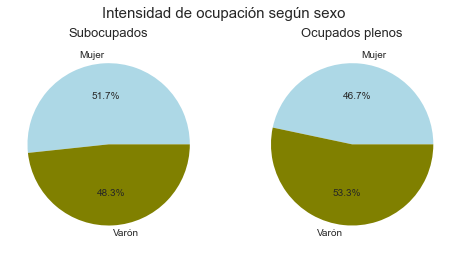

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

labels1= sexoo.index

fig.suptitle('Intensidad de ocupación según sexo', fontsize=15)
ax1.pie(sexos, colors= ["lightblue", "olive",], autopct='%1.1f%%', labels= labels1)
ax1.set_title('Subocupados', fontsize=13)
ax2.pie(sexoo, colors= ["lightblue", "olive"], autopct='%1.1f%%', labels= labels1)
ax2.set_title('Ocupados plenos', fontsize=13);


Contrario a lo esperado, el sexo no parece tener una fuerte incidencia sobre la subocupación. Sí hay una diferencia un poco más notable en el grupo de ocupados plenos (grupo cuyo análisis en sí mismo no interesa, simplemente está como una suerte de grupo de control)

In [29]:
#Intensidad de la ocupación según nivel educativo
round(ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"].NIVEL_EDUCATIVO.value_counts(normalize= True).sort_index(ascending=True)*100)

Primario completo                    16.0
Primario incompleto                   4.0
Secundario completo                  27.0
Secundario incompleto                24.0
Sin instrucción                       1.0
Superior universitario completo      13.0
Superior universitario incompleto    15.0
Name: NIVEL_EDUCATIVO, dtype: float64

In [30]:
round(ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"].NIVEL_EDUCATIVO.value_counts(normalize=True).sort_index(ascending=True)*100)

Primario completo                    12.0
Primario incompleto                   3.0
Secundario completo                  30.0
Secundario incompleto                16.0
Sin instrucción                       0.0
Superior universitario completo      24.0
Superior universitario incompleto    15.0
Name: NIVEL_EDUCATIVO, dtype: float64

Relativicé los valores para poder trabajar con porcentajes hacia adentro de cada grupo. Esto es necesario porque los n de los dos grupos son muy distintos (8253 ocupados plenos y 1987 subocupados).

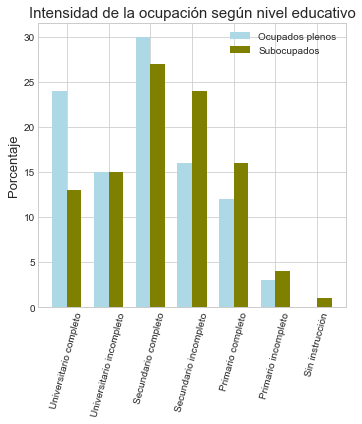

In [31]:
#Cuadro comparando nivel educativo entre subocupados y ocupados plenos en porcentajes.
labels = ['Universitario completo', 'Universitario incompleto', 'Secundario completo', 'Secundario incompleto', 'Primario completo', "Primario incompleto", "Sin instrucción"]
ocupadop = [24.0, 15.0, 30.0, 16.0, 12.0, 3.0, 0.0]
subo= [13, 15, 27, 24, 16, 4, 1]

x = np.arange(len(labels))  
width = 0.35  


fig, ax = plt.subplots(figsize=(5,6))
rects1 = ax.bar(x - width/2, ocupadop, width, label='Ocupados plenos', color="lightblue")
rects2 = ax.bar(x + width/2, subo, width, label='Subocupados', color="olive")

ax.set_ylabel('Porcentaje', fontsize=13)
ax.set_title('Intensidad de la ocupación según nivel educativo', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=10)
ax.legend()

plt.xticks(rotation=75)
fig.tight_layout()

plt.show()

Resulta interesante cómo hay mayor proporción de subocupados que de ocupados en las categorías de nivel educativo más bajo (sin instrucción, primario incompleto y primario completo) y cómo hay mayor proporción de ocupados plenos en las categorías más altas de nivel educativo (sobre todo, universitario completo y secundario completo).

In [32]:
#Intensidad de la educación según edad
subocupados = ocupados.loc[ocupados['INTENSIDAD_DE_LA_OCUPACIÓN'].isin(['Subocupado'])]  
ocupados_plenos = ocupados.loc[ocupados['INTENSIDAD_DE_LA_OCUPACIÓN'].isin(['Ocupado pleno'])]  


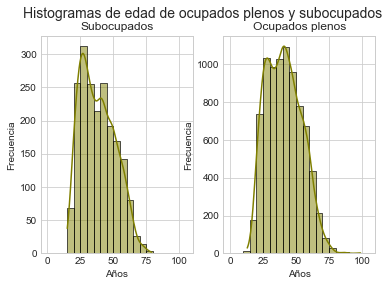

In [37]:
fig, axes = plt.subplots(1, 2)
intervalos = range(0, 110, 5)

sns.histplot(ax= axes[0], data = subocupados.AÑOS, bins=intervalos, color= "olive", kde= True)
axes[0].set(xlabel = "Años", ylabel = "Frecuencia", title = "Subocupados")
sns.histplot(ax= axes[1], data = ocupados_plenos.AÑOS, bins=intervalos, color= "olive", kde= True)
axes[1].set(xlabel = "Años", ylabel = "Frecuencia", title = "Ocupados plenos")
fig.suptitle('Histogramas de edad de ocupados plenos y subocupados', fontsize=14);


In [38]:
subocupados.AÑOS.describe()

count    1987.000000
mean       38.166080
std        12.897637
min        15.000000
25%        27.000000
50%        37.000000
75%        48.000000
max        79.000000
Name: AÑOS, dtype: float64

In [39]:
ocupados_plenos.AÑOS.describe()

count    8253.000000
mean       40.831698
std        13.195256
min        13.000000
25%        30.000000
50%        40.000000
75%        50.000000
max        99.000000
Name: AÑOS, dtype: float64

La distribución de los subocupados es, a simple vista, una distribución más sesgada hacia la izquierda. Además, mientras que la moda de subocupados es de 25 a 30, la de ocupados plenos es de 40 a 45. A su vez, la media de ocupados es 2 años mayor que la de subocupados (con desvíos estándares similares). 

In [4]:
#Intensidad según ingreso

#Creación de una columna que contemple la situación de pobreza o indigencia según el total de ingresos percibidos por las personas 
def calcula_indice(ingresos):
    if ingresos < 8312:
        return "Personas por debajo de la línea de indigencia"
    elif ingresos < 19700: 
        return "Personas por debajo de la línea de pobreza"
    else:
        return "Personas por sobre la línea de pobreza"
        
ocupados['SITUACION'] = ocupados.apply(lambda x: calcula_indice(x['MONTO_DE_INGRESO_TOTAL']),axis=1)

In [5]:
sub = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"]
subin = sub.groupby(["MONTO_DE_INGRESO_TOTAL", "SITUACION"])["CODUSU"].count()
subing = subin.reset_index()
print(subing)

     MONTO_DE_INGRESO_TOTAL                                      SITUACION  \
0                         0  Personas por debajo de la línea de indigencia   
1                       200  Personas por debajo de la línea de indigencia   
2                       700  Personas por debajo de la línea de indigencia   
3                       900  Personas por debajo de la línea de indigencia   
4                      1000  Personas por debajo de la línea de indigencia   
..                      ...                                            ...   
300                  109900         Personas por sobre la línea de pobreza   
301                  110000         Personas por sobre la línea de pobreza   
302                  135000         Personas por sobre la línea de pobreza   
303                  150000         Personas por sobre la línea de pobreza   
304                  153000         Personas por sobre la línea de pobreza   

     CODUSU  
0        68  
1         1  
2         2  
3      

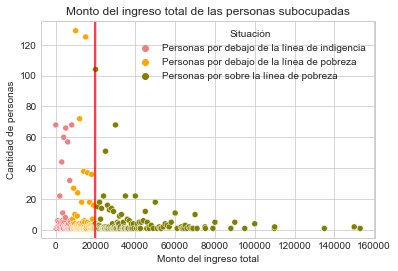

In [6]:
sns.scatterplot(x="MONTO_DE_INGRESO_TOTAL", y="CODUSU", hue="SITUACION", data= subing, palette = ["lightcoral", "orange", "olive" ])
plt.xlabel("Monto del ingreso total")
plt.ylabel("Cantidad de personas")
plt.axvline(19700, color='red')
plt.title("Monto del ingreso total de las personas subocupadas")
plt.legend(title = "Situación");

In [7]:
ocupadosplenos = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"]
ocin = ocupadosplenos.groupby(["MONTO_DE_INGRESO_TOTAL", "SITUACION"])["CODUSU"].count()
ocing = ocin.reset_index()


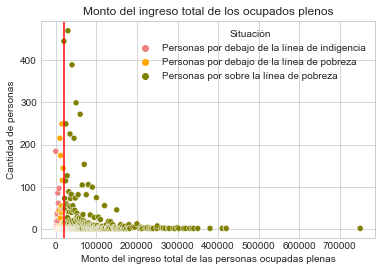

In [8]:
sns.scatterplot(x="MONTO_DE_INGRESO_TOTAL", y="CODUSU", hue="SITUACION", data= ocing, palette = ["lightcoral", "orange", "olive" ])
plt.xlabel("Monto del ingreso total de las personas ocupadas plenas")
plt.ylabel("Cantidad de personas")
plt.axvline(19700, color='red')
plt.title("Monto del ingreso total de los ocupados plenos")
plt.legend(title = "Situación");



In [9]:
#Eliminé outliers para poder comparar mejor
ocout = ocing.drop(ocing[ocing.MONTO_DE_INGRESO_TOTAL > 600000 ].index)
ocout.MONTO_DE_INGRESO_TOTAL.describe()

count       608.000000
mean      60919.447368
std       69292.497020
min           0.000000
25%       18845.000000
50%       35550.000000
75%       76325.000000
max      420000.000000
Name: MONTO_DE_INGRESO_TOTAL, dtype: float64

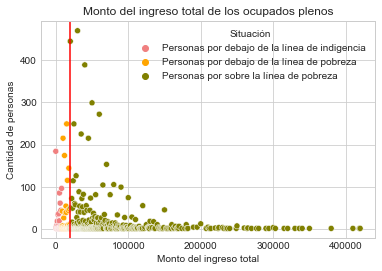

In [10]:
sns.scatterplot(x="MONTO_DE_INGRESO_TOTAL", y="CODUSU", hue="SITUACION", data= ocout, palette = ["lightcoral", "orange", "olive" ])
plt.xlabel("Monto del ingreso total")
plt.ylabel("Cantidad de personas")
plt.axvline(19700, color='red')
plt.title("Monto del ingreso total de los ocupados plenos")
plt.legend(title = "Situación");

Limité el eje x visible en el gráfico para poder apreciar mejor los hogares bajo laa líneas de pobreza e indigencia. 

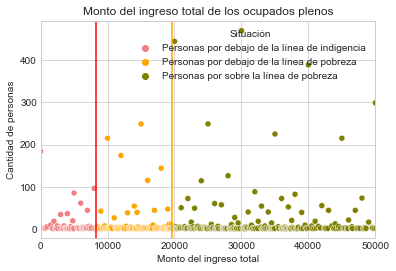

In [21]:
oc = sns.scatterplot(x="MONTO_DE_INGRESO_TOTAL", y="CODUSU", hue="SITUACION", data= ocout, palette = ["lightcoral", "orange", "olive" ])
plt.xlabel("Monto del ingreso total")
plt.ylabel("Cantidad de personas")
plt.axvline(19700, color='orange')
plt.axvline(8312, color='red')
oc.set_xlim(0, 50000)
plt.title("Monto del ingreso total de los ocupados plenos")
plt.legend(title = "Situación");

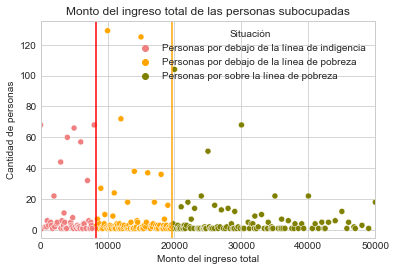

In [22]:
sb = sns.scatterplot(x="MONTO_DE_INGRESO_TOTAL", y="CODUSU", hue="SITUACION", data= subing, palette = ["lightcoral", "orange", "olive" ])
plt.xlabel("Monto del ingreso total")
plt.ylabel("Cantidad de personas")
plt.axvline(19700, color='orange')
plt.axvline(8312, color='red')
sb.set_xlim(0, 50000)
plt.title("Monto del ingreso total de las personas subocupadas")
plt.legend(title = "Situación");

Incluso habiendo eliminado los outliers solamente de una de las distribuciones (la de ocupados plenos), queda en evidencia la desigual distribución del ingreso. A simple vista podemos ver que hay más personas bajo la línea de indigencia (8312 pesos) y de pobreza (19700 pesos) en el grupo de subocupados que en el de ocupados plenos.  
Cabe aclarar que los valores son los relevados por el INDEC para el mes de marzo de 2021.

In [31]:
#Según ingreso familiar total
def calcula_pobreza(ingresos):
    if ingresos < 25685:
        return "Hogares por debajo de la línea de indigencia"
    elif ingresos < 60874: 
        return "Hogares por debajo de la línea de pobreza"
    else:
        return "Hogares por sobre la línea de pobreza"
        
ocupados['FAMILIA'] = ocupados.apply(lambda x: calcula_pobreza(x['INGRESO_TOTAL_FAMILIAR']),axis=1)


In [32]:
ocpleno = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"]
familiapleno = ocpleno.groupby(["INGRESO_TOTAL_FAMILIAR", "FAMILIA"])["CODUSU"].count()
familiaplenoin = familiapleno.reset_index()

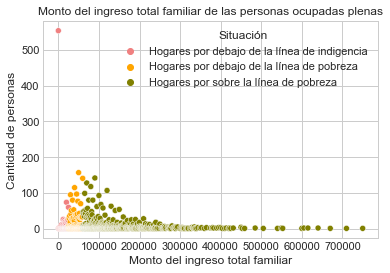

In [37]:
sns.scatterplot(x="INGRESO_TOTAL_FAMILIAR", y="CODUSU", hue="FAMILIA", data= familiaplenoin, palette = ["lightcoral", "orange", "olive" ])
plt.xlabel("Monto del ingreso total familiar")
plt.ylabel("Cantidad de personas")
plt.title("Monto del ingreso total familiar de las personas ocupadas plenas")
plt.legend(title = "Situación");

In [35]:
subem = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"]
familiasubo = subem.groupby(["INGRESO_TOTAL_FAMILIAR", "FAMILIA"])["CODUSU"].count()
familiasub = familiasubo.reset_index()

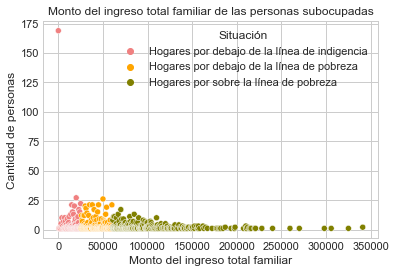

In [36]:
sns.scatterplot(x="INGRESO_TOTAL_FAMILIAR", y="CODUSU", hue="FAMILIA", data= familiasub, palette = ["lightcoral", "orange", "olive" ])
plt.xlabel("Monto del ingreso total familiar")
plt.ylabel("Cantidad de personas")
plt.title("Monto del ingreso total familiar de las personas subocupadas")
plt.legend(title = "Situación");

In [24]:
#Recorte de outliers para que quede más clara la distribución y boxplot de ingreso familiar
sinout = ocupados.drop(ocupados[ocupados.INGRESO_TOTAL_FAMILIAR > 400000 ].index)

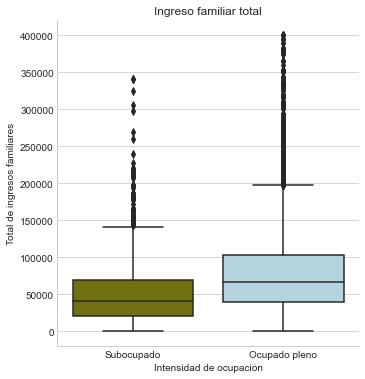

In [26]:
my_pal = {"Subocupado": "olive", "Ocupado pleno": "lightblue"}
plt = sns.catplot(x="INTENSIDAD_DE_LA_OCUPACIÓN", y="INGRESO_TOTAL_FAMILIAR", kind="box", palette=my_pal, data=sinout)
plt.set(xlabel = "Intensidad de ocupación", ylabel = "Total de ingresos familiares", title= "Ingreso familiar total");

Resulta claro que las personas subocupadas habitan hogares más pobres: la mediana de los hogares de ocupados plenos se situa casi en el mismo lugar que en el tercer cuartil de los subocupados. Los valores que marcan la línea de pobreza e indigencia para hogares (hogares tipo: 2 padres en sus treintas y un hijo de 6 y una hija de 8) son 60874 pesos y 25685 pesos, respectivamente. Es decir, que más de la mitad de los hogares de personas subocupadas están por debajo de la línea de pobreza  (situación que no sucede en los hogares de ocupados plenos).  
Cabe aclarar que los valores son los relevados por el INDEC para el mes de marzo de 2021.

In [12]:
#Intensidad de la ocupación según si recibe o no aportes jubilatorios 
aportesoc = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Ocupado pleno"].DESCUENTO_POR_JUBILACIÓN.value_counts()
aportessub = ocupados[ocupados.INTENSIDAD_DE_LA_OCUPACIÓN == "Subocupado"].DESCUENTO_POR_JUBILACIÓN.value_counts()
print(aportesoc)
print(aportessub)


Sí                                          4102
No                                          2204
No le corresponde la secuencia analizada    1947
Name: DESCUENTO_POR_JUBILACIÓN, dtype: int64
No                                          873
No le corresponde la secuencia analizada    840
Sí                                          274
Name: DESCUENTO_POR_JUBILACIÓN, dtype: int64


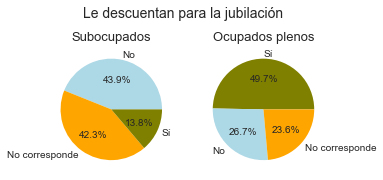

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,3))
lab3l = ["Sí", "No", "No corresponde"]
l4bel = ["No", "No corresponde", "Sí"]
fig.suptitle('Le descuentan para la jubilación', fontsize=14)
ax1.pie(aportessub, colors= ["lightblue", "orange", "olive"], labels= l4bel, autopct='%1.1f%%')
ax1.set_title('Subocupados', fontsize=13)
ax2.pie(aportesoc, colors= ["olive","lightblue", "orange"], autopct='%1.1f%%', labels= lab3l)
ax2.set_title('Ocupados plenos', fontsize=13);


Del análisis de esta figura resultan interesantes dos cosas: la abrumadora minoría de personas a las que sí les decuentan en subocupados (en comparación con la mtiad de ocupados plenos a los que sí) y la gran cantidad de personas ocupadas a las que no corresponde esta pregunta (también notoria la diferencia en esta categoría con los ocupados plenos). Podríamos, tomando si le descuentan para la jubilación como proxy de estar (o no) relación de dependencia formal, concluir que casi la mitad de los desocupados en relación de dependencia están informalizados.  
Para analizar porqué hay tantas personas a las que no corresponde hacerles esa pregunta (si les descuentan, o no, jubilación), cabe observar qué sucede con las categorías ocupacionales.

In [7]:
#Intensidad de la ocupación según categorías ocupacionales
ocupación_cat = ocupados.groupby(["INTENSIDAD_DE_LA_OCUPACIÓN", "CATEGORÍA_OCUPACIONAL"])["CODUSU"].count()
print(ocupación_cat)


INTENSIDAD_DE_LA_OCUPACIÓN  CATEGORÍA_OCUPACIONAL               
Ocupado pleno               Cuenta propia                           1631
                            Obrero o empleado                       6306
                            Patrón                                   230
                            Trabajador familiar sin remuneración      86
Subocupado                  Cuenta propia                            807
                            Obrero o empleado                       1147
                            Patrón                                    17
                            Trabajador familiar sin remuneración      16
Name: CODUSU, dtype: int64


In [8]:
ocxcat = ocupación_cat.reset_index(inplace= False)
ocxcat['porcentajes'] = np.where(ocxcat['INTENSIDAD_DE_LA_OCUPACIÓN']=='Subocupado', 100*ocxcat.CODUSU/1987, 100*ocxcat.CODUSU/8253)
print(ocxcat)


  INTENSIDAD_DE_LA_OCUPACIÓN                 CATEGORÍA_OCUPACIONAL  CODUSU  \
0              Ocupado pleno                         Cuenta propia    1631   
1              Ocupado pleno                     Obrero o empleado    6306   
2              Ocupado pleno                                Patrón     230   
3              Ocupado pleno  Trabajador familiar sin remuneración      86   
4                 Subocupado                         Cuenta propia     807   
5                 Subocupado                     Obrero o empleado    1147   
6                 Subocupado                                Patrón      17   
7                 Subocupado  Trabajador familiar sin remuneración      16   

   porcentajes  
0    19.762511  
1    76.408579  
2     2.786865  
3     1.042045  
4    40.613991  
5    57.725214  
6     0.855561  
7     0.805234  


Creé una nueva columna con los porcentajes calculados sobre el total de cada grupo (ocupados plenos y subocupados) para poder comparar mejor los grupos.

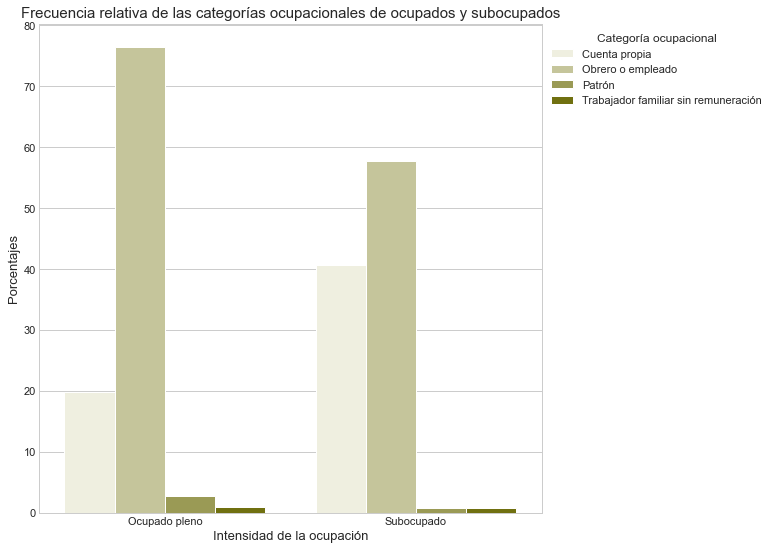

In [12]:
ax = sns.barplot(x="INTENSIDAD_DE_LA_OCUPACIÓN", y="porcentajes", hue="CATEGORÍA_OCUPACIONAL", data=ocxcat, color= "olive")
plt.xlabel("Intensidad de la ocupación", fontsize=13)
plt.ylabel("Porcentajes",  fontsize=13)
plt.legend(title = "Categoría ocupacional", loc = 2, bbox_to_anchor = (1,1))
sns.set(rc={'figure.figsize':(9,9)})
plt.title("Frecuencia relativa de las categorías ocupacionales de ocupados y subocupados", fontsize=15);

Es notoria la presencia de cuentapropistas entre los subocupados. Parecería que la diferencia que se da en la categoría empleados u obreros entre los dos grupos se compenza con la presencia de una mayor proporción de cuentapropistas en los subocupados.

# 5 Conclusiones

Respecto al cruce que se hizo de los grupos por sexo, cabe mencionar que, si bien no es extraño que las mujeres sean las más subocupadas (por discriminación y prejuicios a la hora de contratar y por la mayor cantidad de horas que le dedican a trabajos de cuidado no remunerados por fuera del mercado laboral), desde los 90' en Argentina se viene dando un fenómeno particular: el aumento de la subocupación, y de otro tipo de situaciones de precarización, entre grupos antes excentos de estas. Con la transformación del mercado laboral y de la estructura económica que se dió en los 90', y la consecuente caída de la demanda laboral, la subocupación pasó a ser un fenómeno que atañe también a los históricos "jefes de hogar" (Beccaria, 2003).  
  
El gráfico del nivel educativo es tajante: los ocupados plenos están compuestos por un porcentaje mayor personas con niveles educativos más altos que por personas con niveles educativos más bajos. Por supuesto, la relación entre nivel educativo e inserción laboral es fuerte: las personas en sus trayectorias educativas construyen redes sociales que servirán de capital social y otros capitales específicos que, generalmente, servirán para una mejor inserción en el mercado laboral. Por supuesto, esta es una rueda que gira sola, o una dinámica social con reproducción inerencial, las personas que logran terminar niveles educativos más altos suelen ser personas que provienen de familias que ya cuentan con cierto capital económico, social y cultural (Bourdieu, 2013).  

Los subocupados tienden a ser más jóvenes que los ocupados plenos: la distribución de los subocupados es una distribución más sesgada hacia la izquierda. Esto no es casual, como Castel (1997) señala, la inserción laboral de los jóvenes es cada vez más errática y dificil: las trayectorias contemplan, en sus inicios, cada vez más situaciones de precarización.
  
Sobre ingresos creo, sobre todo, interesante el boxplot que considera el ingreso familiar (porque que las personas que trabajan menos horas van a tener menos ingresos es medio obvio). Pero lo interesante de analizar el ingreso familiar es ver cómo esos ingresos más bajos no pueden ser compensados en el hogar por alguna otra persona que gané (y probablemente trabaje) más. Es decir, los subocupados suelen habitar hogares pobres, qué situación se da primero es un punto que excede este análsis pero una punta para seguir pensando ineludible: ¿las personas que habitan hogares pobres tienen más probabilidades de ser subocupadas? Lo antedicho sobre el nivel educativo va en esa misma línea.  
  
Como se mencionó en la presentación de los datos, si les descuentan o no jubilación fue elegido como indicador proxy de si están en una relación de dependencia formal o informal. En el grupo de subocupados solamente un 13,8% está, siguiendo la línea de análisis propuesta, en relación de dependencia formal, casi la mitad en informal y (detalle interesante) 42% de los preguntados no calificaban para responder la pregunta (es decir, no eran personas a las que está la posibilidad en su trabajo de que un otro le descuente aportes para la jubilación). Esto llevó al análisis de las categorías ocupacionales, ¿quiénes son los subocupados? Si bien muchos son obreros y empleados, el 40% (número elevado en comparación con los ocupados plenos) son cuentapropistas. Ya lo advertía Villareal (1985), la transformación de la estructura productiva realizada durante la última dictadura militar trajó aparejada un aumento de los trabajadores independientes en detrimento del sector asalariado industrial formal. Este proceso produjo, como evidencia el último cuadro, una vinculación entre el trabajo cuentapropista independiente y la precarización laboral; los trabajadores independientes trabajan a pequeña escala, con escasos recursos (y muchos menos de 35 horas semanales).




# 6 Referencias

https://www.indec.gob.ar/uploads/informesdeprensa/canasta_04_21EDC756AEAE.pdf  
Beccaria, L. (2003) "Las vicisitudes del mercado laboral argentino luego de las reformas", en Boletín Informativo Techint, nro. 312.  
Bourdieu, P. y Passeron, J. P. (2013). Los herederos. Siglo XXI.  
Villareal, J. (1985). Crisis de la dictadura argentina. Siglo XXI.  
Castel, R. (1997). Metamorfosis de la cuestión social. Paidós.